# Starling Recognition Dataset Exploratory Analysis

In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

#### Image Count per Species

In [2]:
bird_categories = {
    'Starling': 'web_scrape/starling',
    'Grackle': 'web_scrape/grackle',
    'Blackbird': 'web_scrape/blackbird',
    'Cowbird': 'web_scrape/cowbird'
}

total_images = 0
for bird, folder in bird_categories.items():
    existing_images = len([name for name in os.listdir(folder)])  #Count how many images are already in the folder
    print(f'{bird}: {existing_images}')
    total_images += existing_images

print(f"\nTotal Images: {total_images}")


Starling: 85
Grackle: 165
Blackbird: 203
Cowbird: 111

Total Images: 564


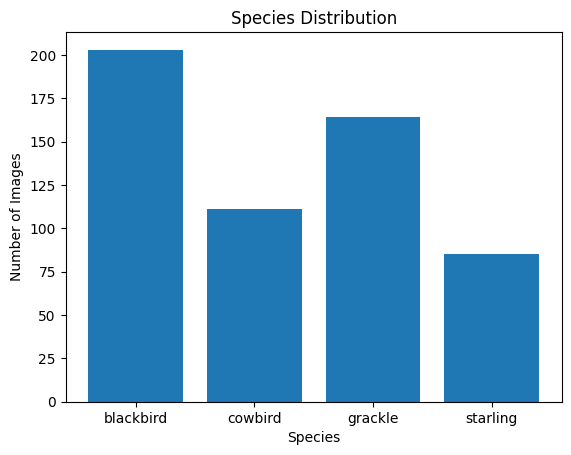

In [3]:
dataset_path = "./web_scrape" # Path to dataset

# Function to load images into lists
def load_images(dataset_path):
    images = []
    bird_names = []
    for folder in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder)
        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                if file.lower().endswith('jpg'):
                    images.append(file_path)
                    bird_names.append(folder)
    return images, bird_names

images, bird_names = load_images(dataset_path)

label_counts = Counter(bird_names)
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Species')
plt.ylabel('Number of Images')
plt.title('Species Distribution')
plt.show()

#### Visualizing the Dataset

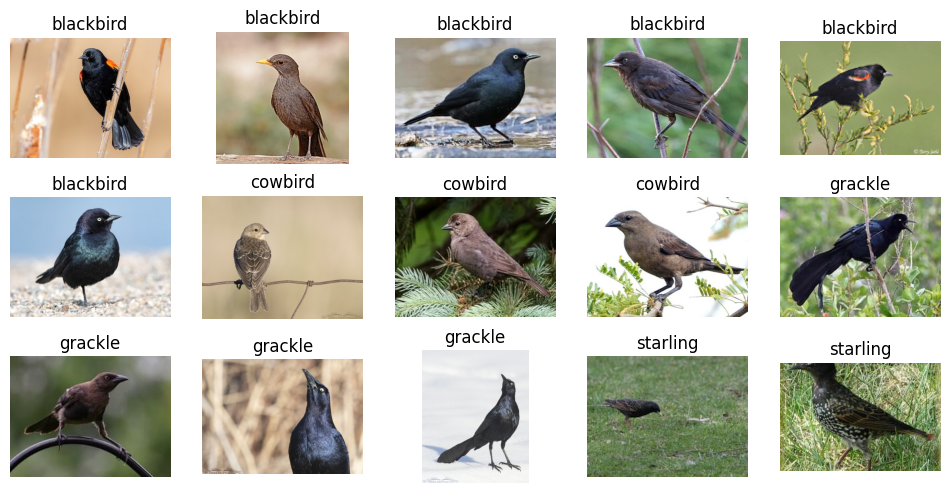

In [4]:
def plot_images(images, bird_names, total_images):
    '''Function to plot some of the images from the dataset'''
    rows = min((total_images + 4) // 5, 5)  # Dynamically calculate rows
    cols = 5
    plt.figure(figsize=(12, rows * 2 ))

    for index, i in enumerate(range(0, total_images, 39)):
        img = Image.open(images[i])
        plt.subplot(rows, cols, index + 1)
        plt.imshow(img)
        plt.title(bird_names[i])
        plt.axis('off')
    plt.show()

plot_images(images, bird_names, total_images)


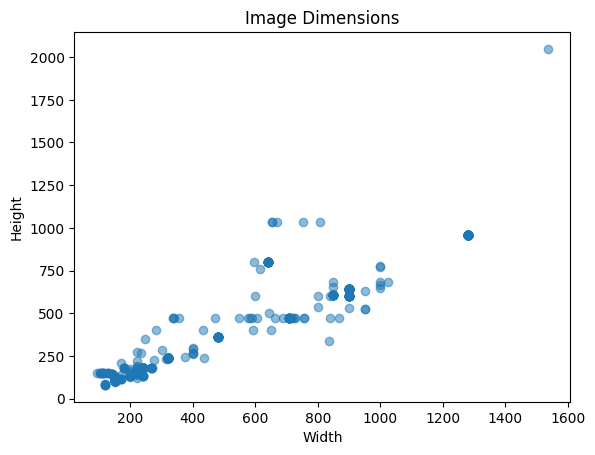

In [5]:
dimensions = [Image.open(img).size for img in images]
widths, heights = zip(*dimensions)

plt.scatter(widths, heights, alpha=0.5)
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Image Dimensions')
plt.show()

#### Conclusion

The dataset requires further data collection to increase the number of images for each species, particularly starlings. Although the dataset is intended to focus on starlings, they currently have the fewest images. This is because other bird types include multiple subspecies, which expands the range of sources available for web scraping, whereas there is only one species of starling.

The existing images in the dataset are of high quality: they are well-focused, similar in size, feature a single bird, and the bird is the central focal point of each image. This consistency ensures that the dataset is suitable for machine learning applications because clear and focused images are important for accurate model training.